In [1]:
import numpy as np
import os 
import pandas as pd
import sys
import matplotlib
import math
from scipy.optimize import minimize,approx_fprime

In [16]:
data = np.load("../data/data.npz")
Xtr = data["Xtr"]
Ytr = data["Ytr"]
Xte = data["Xte"]
Yte = data["Yte"]
Ytr=Ytr.reshape(Ytr.shape[0])
Xtr=Xtr.reshape(Xtr.shape[0])
Yte=Yte.reshape(Yte.shape[0])
Xte=Xte.reshape(Xte.shape[0])

In [19]:
class Model:
    def __init__(self,rho,tol):
        self.rho=rho
        self.K=self.rho.size
        self.tol=tol
        self.theta_hat=[]
        self.method="L-BFGS-B"

    def f(self,theta,X):
        if len(theta)==2*self.K+1:
            b=theta[-1]
            w=theta[:self.K]
            phi=theta[self.K:2*self.K]
            fx=[]
            for x in X:
                val=0
                for k in range(self.K):
                    val+=w[k]*math.cos((2*math.pi*x/self.rho[k])-phi[k])
                fx.append(b+val)
            return fx
    
    def risk(self,theta,X,Y):
        Ypred=np.array(self.f(theta,X))
        print(Ypred)
        loss=(np.array(Y)-Ypred)**2
        return np.sum(loss)/len(X)
    
    def riskgrad(self,theta,X,Y):
        Y_pred=np.array(self.f(theta,X))
        riskgrad=np.zeros(2*self.K+1)
        for i in range(len(X)):
            loss=Y_pred[i]-Y[i]
            for k in range(self.K):
                riskgrad[k]+=loss*math.cos(2*math.pi*X[i]/self.rho[k]-theta[k+self.K])
            for k in range(self.K,2*self.K):
                riskgrad[k]+=loss*theta[k-self.K]*math.sin(2*math.pi*X[i]/self.rho[k-self.K]-theta[k])
            riskgrad[-1]+=loss
        return riskgrad*2/len(X)
    
    def fit(self,X,Y):
        x0=np.zeros(2*self.K+1)
        minimizing=minimize(self.risk,x0,args=(X,Y),tol=self.tol,method=self.method,options={"disp":1})
        self.theta_hat=minimizing.x
        return self.theta_hat

In [20]:
Xold=[20,40]
Yold=[0,2.5]
rho=np.array([50,25])
theta=np.array([0.5,0.75,-0.25,0.75,1])
model1=Model(rho,1e-6)
risk=model1.risk(theta,Xold,Yold)
print(risk)


[0.21872698 0.52289832]
1.978386269667155


In [21]:
rho=np.array([12.42, 12.00, 12.66, 23.93, 25.82, 6.21, 4.14, 6.00, 6.10])
tol=1e-6
model=Model(rho,tol)
theta0=np.ones(2*model.K+1)

##Q6a

In [22]:
risk=model.risk(theta0,Xtr,Ytr)
print(risk)

[ 5.86272075e+00  8.97951662e+00  6.77896165e+00  3.13347283e+00
  1.88648100e+00  2.36556427e+00  2.44329707e+00  1.92832320e+00
  9.26174682e-01 -1.32624393e+00 -3.64963466e+00 -2.60559836e+00
  2.21735626e+00  5.91037591e+00  4.40136350e+00  5.84921373e-02
 -2.14563781e+00 -1.42914427e+00 -5.66299439e-01 -8.03376329e-01
 -1.37964219e+00 -2.30710808e+00 -3.51378358e+00 -2.62834603e+00
  2.06025884e+00  7.33331825e+00  8.14271676e+00  4.63979374e+00
  1.83399211e+00  2.28210829e+00  3.47194169e+00  2.87397942e+00
  1.17672938e+00 -4.68425312e-01 -2.16736571e+00 -2.88937946e+00
 -5.24538783e-01  3.79967939e+00  5.39687552e+00  2.35033470e+00
 -1.38394382e+00 -1.74164315e+00 -3.36225286e-02  2.22888944e-01
 -1.22142784e+00 -2.38421907e+00 -2.81279101e+00 -2.70747259e+00
 -6.80092195e-01  3.70347716e+00  7.07605237e+00  6.09736369e+00
  2.74506350e+00  1.66529798e+00  3.31508903e+00  4.01383276e+00
  2.15133501e+00 -1.01479015e-01 -1.14613311e+00 -1.59906525e+00
 -1.27904795e+00  1.01394

##Q6b

In [23]:
riskgrad=model.riskgrad(theta0,Xtr,Ytr)
print(riskgrad)

[ 0.83104621  1.1705249   1.07839678  0.86892169  0.95695649  0.94785829
  1.0144125   0.88121832  0.90573908 -0.55376932 -0.18509614 -0.06564822
 -0.03534974 -0.01394138 -0.04992698 -0.00741326  0.06708419 -0.05207442
 -0.79419585]


In [24]:
from scipy.optimize import check_grad

chk1=np.sum(np.array([check_grad(model.risk,model.riskgrad,theta0,Xtr[i],Ytr[i]) for i in range(len(Xtr))]))/len(Xtr)
print(chk1)
eps = np.sqrt(np.finfo(float).eps)
print(eps)
chk=np.sum(np.array([approx_fprime(theta0,model.risk,eps,Xtr[i],Ytr[i]) for i in range(len(Xtr))]),0)/len(Xtr)
print(chk)

TypeError: 'numpy.int64' object is not iterable

##Q6c

In [25]:
theta_hat=model.fit(Xtr,Ytr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

 This problem is unconstrained.



At iterate    1    f=  3.30477D-01    |proj g|=  8.39046D-01
[0.92269375 0.99898359 1.19912665 1.46857707 1.73380024 1.92381707
 1.98921062 1.91164897 1.7057478  1.41740081 1.1163872  0.87934712
 0.7673899  0.80864439 0.99166015 1.26902276 1.5698483  1.81944497
 1.9595701  1.9610623  1.82748657 1.59411865 1.32264224 1.08715463
 0.9524737  0.95448079 1.09115577 1.32473961 1.59204516 1.82136331
 1.95223019 1.95044171 1.81390769 1.57209569 1.28167503 1.01523984
 0.84143759 0.80397765 0.9099826  1.1304479  1.40893564 1.6758147
 1.86643227 1.93775422 1.87717981 1.70337436 1.4626156  1.21993914
 1.04221894 0.97743744 1.04071292 1.21264598 1.44658526 1.68043321
 1.85212806 1.91621521 1.85514039 1.6819092  1.43672036 1.17937931
 0.97528463 0.87620678 0.90471716 1.05006292 1.27396542 1.52066489
 1.72964561 1.85096908 1.85850712 1.75530852 1.57123215 1.35616336
 1.16870345 1.05971491 1.0565751  1.15669361 1.33146315 1.53485292
 1.71348608 1.81945946 1.82394538 1.72504478 1.54683922 1.3327982
 1

In [390]:
print(theta_hat)

[-1.11371156e-07  7.17747688e-09 -1.79823043e-07 -2.57218320e-07
 -1.11059137e-07  3.93862490e-07 -3.12394679e-07  8.85399518e-07
  6.62024294e-07  1.63617055e-07  3.19100461e-09 -2.96017740e-10
  5.46115515e-07 -3.70539013e-09  3.29100761e-07  4.03739960e-07
 -5.05765639e-09 -7.79089565e-09  1.40487649e+00]


##Q6d

In [391]:
aslosstr=model.risk(theta_hat,Xtr,Ytr)
aslosste=model.risk(theta_hat,Xte,Yte)
print("Training loss:{}  Test loss:{}".format(aslosstr,aslosste))

Training loss:149.95276874900583  Test loss:165.58732873099905


18.759658987954804


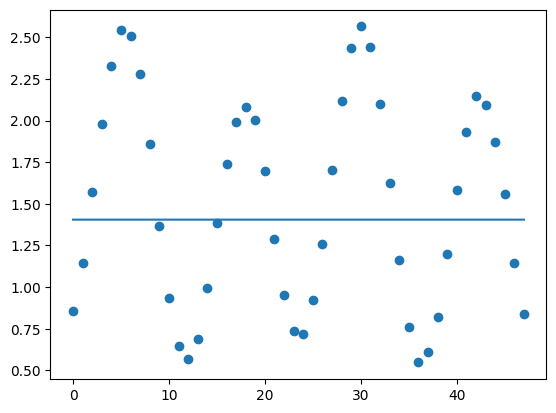

In [392]:
import matplotlib.pyplot as plt
Xe=Xtr[:48]
Ye=Ytr[:48]
Ye_pred=model.f(theta_hat,Xe)
plt.scatter(Xe,Ye)
plt.plot(Xe,Ye_pred)
print(model.risk(theta_hat,Xe,Ye))

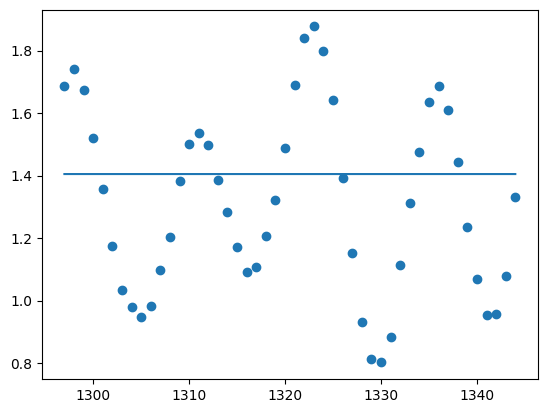

4.4263463764463635


In [393]:
import matplotlib.pyplot as plt
Xe=Xte[-48:]
Ye=Yte[-48:]
Ye_pred=model.f(theta_hat,Xe)
plt.scatter(Xe,Ye)
plt.plot(Xe,Ye_pred)
plt.show()
print(model.risk(theta_hat,Xe,Ye))